Christian Reiser
feedback requested

In [34]:
import mne
import ccs_eeg_utils
# Load the data
from mne_bids import (BIDSPath,read_raw_bids)
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure

import numpy as np

In [35]:
# path where to save the datasets.
bids_root = "../local/bids"
subject_id = '002' # recommend subject 2 for now


bids_path = BIDSPath(subject=subject_id,task="P3",session="P3",
                     datatype='eeg', suffix='eeg',
                     root=bids_root)

# read the file
raw = read_raw_bids(bids_path)
# fix the annotations readin
ccs_eeg_utils.read_annotations_core(bids_path,raw)
raw.load_data()

Reading ../local/bids/sub-002/ses-P3/eeg/sub-002_task-P3_eeg.fdt
Reading events from ../local/bids/sub-002/ses-P3/eeg/sub-002_ses-P3_task-P3_events.tsv.
Reading channel info from ../local/bids/sub-002/ses-P3/eeg/sub-002_ses-P3_task-P3_channels.tsv.
Reading 0 ... 414719  =      0.000 ...   404.999 secs...


<ipython-input-35-d0eaf7059388>:11: RuntimeWarning: Did not find any coordsystem.json associated with sub-002_ses-P3_task-P3.

The search_str was "../local/bids/sub-002/**/sub-002_ses-P3*coordsystem.json"
  raw = read_raw_bids(bids_path)


<RawEEGLAB | sub-002_task-P3_eeg.fdt, 33 x 414720 (405.0 s), ~104.5 MB, data loaded>

**T:** Extract a single channel and plot the whole timeseries.

num_samples_in_channel 414720


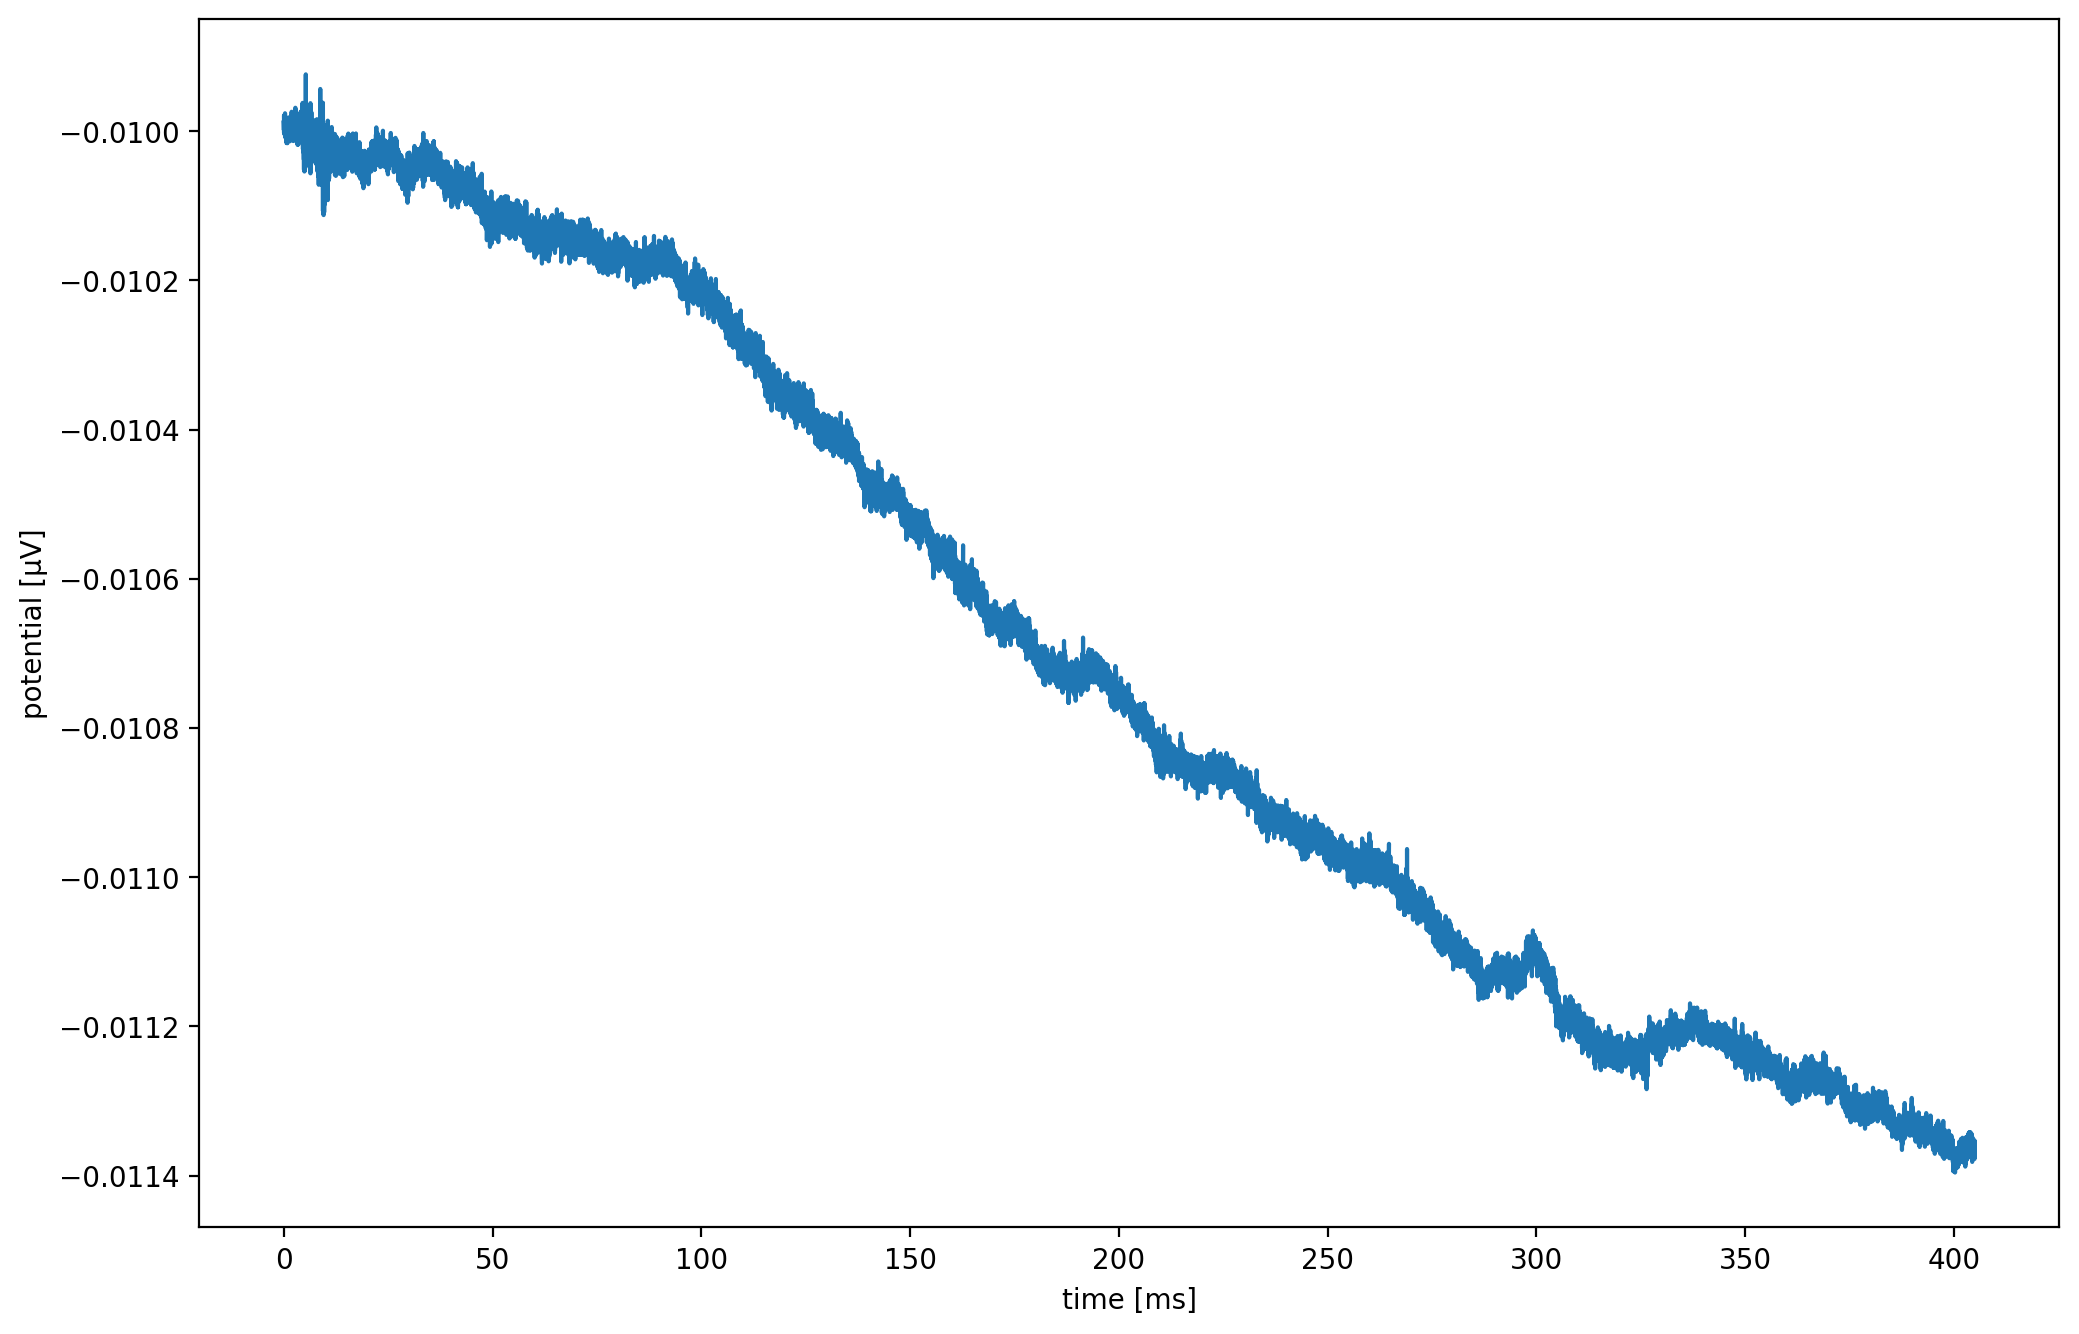

In [36]:
channel_number = 11
num_samples_in_channel = len(raw[channel_number][0][0])
print('num_samples_in_channel',num_samples_in_channel)
time = (raw[channel_number,0:num_samples_in_channel][0][0])
channel = (raw[channel_number,0:num_samples_in_channel][1])
fig=plt.figure(figsize=(12,8), dpi= 200, facecolor='w', edgecolor='k')

plt.plot(channel,time)
plt.ylabel('potential [µV]')
plt.xlabel('time [ms]')
plt.show()


**Q:** What is the unit/scale of the data?
**A:** Electric potential in [µV] and time in [ms]

**T:** Have a look at `raw.info` and note down what the sampling frequency is (how many EEG-samples per second)

In [37]:
raw.info

<Info | 9 non-empty values
 bads: []
 ch_names: FP1, F3, F7, FC3, C3, C5, P3, P7, P9, PO7, PO3, O1, Oz, Pz, CPz, ...
 chs: 30 EEG, 3 EOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 line_freq: 60
 lowpass: 512.0 Hz
 meas_date: unspecified
 nchan: 33
 projs: []
 sfreq: 1024.0 Hz
 subject_info: 4 items (dict)
>

**A**: sampling frequency = 1024.0 Hz

## Epoching 

**T:** We will epoch the data now. Formost we will cut the raw data to one channel using `raw.pick_channels(["Cz"])` - note that this will permanently change the "raw" object and "deletes" alle other channels from memory. If you want rather a copy you could use `raw_subselect = raw.copy().pick_channels(["Cz"]))`.

<RawEEGLAB | sub-002_task-P3_eeg.fdt, 1 x 414720 (405.0 s), ~3.2 MB, data loaded>


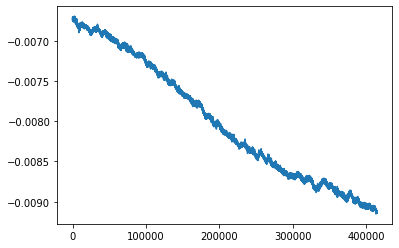

In [38]:
raw.pick_channels(["Cz"])
print(raw)
plt.plot(raw[:,:][0].T)

In [39]:
raw.info

<Info | 9 non-empty values
 bads: []
 ch_names: Cz
 chs: 1 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 line_freq: 60
 lowpass: 512.0 Hz
 meas_date: unspecified
 nchan: 1
 projs: []
 sfreq: 1024.0 Hz
 subject_info: 4 items (dict)
>

**T:** Let's investigate the annotation markers. Have a look at raw.annotations. These values reflect the values in the bids `*_events.tsv`  file (have a look at the files in `../local/bids/sub-002/sub-002_task-P3_events.tsv`). BIDS is a new standard to share neuroimaging and other physiological data. It is not really a fileformat, but more of a folder & filename structure with some additional json files. I highly recommend to put your data into bids-format as soon as possible. It helps you stay organized and on top of things!

In [40]:
raw.annotations

<Annotations | 402 segments: response:201 (198), response:202 (4), ...>

sub-002_task-P3_events.tsv file:

| onset   | duration | sample | trial    | stim_file | value |
|---------|----------|--------|----------|-----------|-------|
| 11.9561 | 0.0      | 12244  | response | n/a       | 202   |
| 13.9639 | 0.0      | 14300  | response | n/a       | 202   |
| 18.3779 | 0.2      | 18820  | stimulus | n/a       | 45    |
| ...     | ...      | ...    | ...      | ...       | ...   |

**T:** MNE-speciality: We have to convert annotations to events with `evts,evts_dict = mne.events_from_annotations(raw)`. Have a look at evts - it shows you the sample, the duration and event-id (with the look-up table evts_dict). In this case we only want to look at stimulus evoked responses, so we subset the event table (note: this could be done after epoching too)

In [41]:
evts,evts_dict = mne.events_from_annotations(raw)

print('\nevts:\n',evts)

# get all keys which contain "stimulus"
wanted_keys = [e for e in evts_dict.keys() if "stimulus" in e]
print('\nwanted_keys:\n', wanted_keys)
# subset the large event-dictionairy
evts_dict_stim=dict((k, evts_dict[k]) for k in wanted_keys if k in evts_dict)
print('\nevts_dict_stim:\n', evts_dict_stim)

Used Annotations descriptions: ['response:201', 'response:202', 'stimulus:11', 'stimulus:12', 'stimulus:13', 'stimulus:14', 'stimulus:15', 'stimulus:21', 'stimulus:22', 'stimulus:23', 'stimulus:24', 'stimulus:25', 'stimulus:31', 'stimulus:32', 'stimulus:33', 'stimulus:34', 'stimulus:35', 'stimulus:41', 'stimulus:42', 'stimulus:43', 'stimulus:44', 'stimulus:45', 'stimulus:51', 'stimulus:52', 'stimulus:53', 'stimulus:54', 'stimulus:55']

evts:
 [[ 12243      0      2]
 [ 14299      0      2]
 [ 18819      0     22]
 ...
 [406442      0      1]
 [407528      0      7]
 [407990      0      1]]

wanted_keys:
 ['stimulus:11', 'stimulus:12', 'stimulus:13', 'stimulus:14', 'stimulus:15', 'stimulus:21', 'stimulus:22', 'stimulus:23', 'stimulus:24', 'stimulus:25', 'stimulus:31', 'stimulus:32', 'stimulus:33', 'stimulus:34', 'stimulus:35', 'stimulus:41', 'stimulus:42', 'stimulus:43', 'stimulus:44', 'stimulus:45', 'stimulus:51', 'stimulus:52', 'stimulus:53', 'stimulus:54', 'stimulus:55']

evts_dict_s

In [42]:
# Epoch the data with 
epochs = mne.Epochs(raw,evts,evts_dict_stim,tmin=-0.1,tmax=1)
epochs

Not setting metadata
Not setting metadata
200 matching events found
Applying baseline correction (mode: mean)
0 projection items activated


<Epochs |  200 events (good & bad), -0.0996094 - 1 sec, baseline [None, 0], ~7 kB, data not loaded,
 'stimulus:11': 8
 'stimulus:12': 8
 'stimulus:13': 5
 'stimulus:14': 8
 'stimulus:15': 11
 'stimulus:21': 5
 'stimulus:22': 8
 'stimulus:23': 9
 'stimulus:24': 7
 'stimulus:25': 11
 'stimulus:31': 4
 'stimulus:32': 9
 'stimulus:33': 8
 'stimulus:34': 9
 'stimulus:35': 10
 'stimulus:41': 11
 'stimulus:42': 5
 'stimulus:43': 4
 'stimulus:44': 8
 'stimulus:45': 12
 'stimulus:51': 16
 'stimulus:52': 5
 'stimulus:53': 7
 'stimulus:54': 4
 'stimulus:55': 8>

Need more than one channel to make topography for eeg. Disabling interactivity.


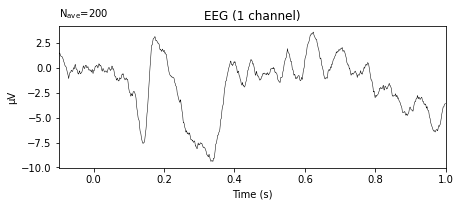

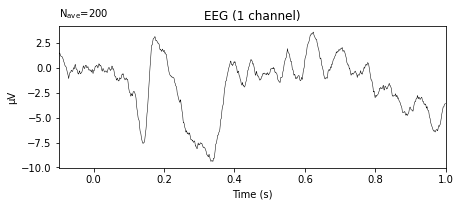

In [43]:
epochs.average().plot()

Loading data for 200 events and 1127 original time points ...
0 bad epochs dropped


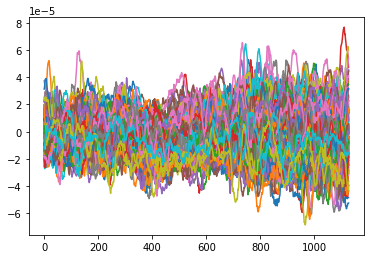

In [44]:
# Now that we have the epochs we should plot them. 
# Plot all trials 'manually', [without using mne's functionality] (`epochs.get_data()`).
plt.plot(np.squeeze(epochs.get_data()[:,0,:].T))


Now index the epochs `evoked = epochs[index].average()` and average them. You can then plot them either via `evoked.plot()` or with `mne.viz.plot_compare_evokeds([evokedA,evokedB])`.

<ipython-input-45-788e17963d39>:6: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds([target,distractor])


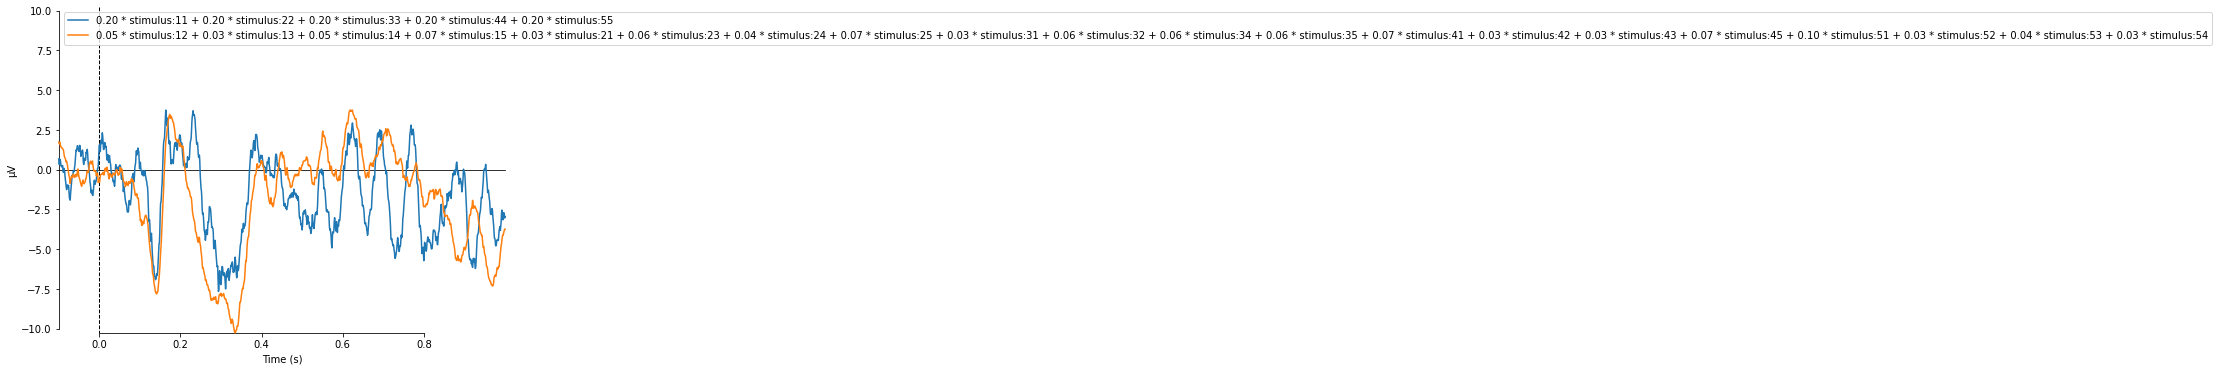

[<Figure size 576x432 with 1 Axes>]

In [45]:
# indexing and averaging epochs
target = epochs[["stimulus:{}{}".format(k,k) for k in [1,2,3,4,5]]].average()
distractor = epochs[["stimulus:{}{}".format(k,j) for k in [1,2,3,4,5] for j in [1,2,3,4,5] if k!=j]].average()

# plotting
mne.viz.plot_compare_evokeds([target,distractor])

**Q** What is the unit/scale of the data now? Set it into context to the other two scales you reported (**Q**'s higher up). 

20µV. So we went from 20.000µV to 100µV to 20µV
